In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('hpp.csv') # house price predicion dataset

In [6]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   OverallQual    1460 non-null   int64
 4   OverallCond    1460 non-null   int64
 5   YearBuilt      1460 non-null   int64
 6   YearRemodAdd   1460 non-null   int64
 7   BsmtFinSF1     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  GrLivArea      1460 non-null   int64
 13  BsmtFullBath   1460 non-null   int64
 14  FullBath       1460 non-null   int64
 15  HalfBath       1460 non-null   int64
 16  BedroomAbvGr   1460 non-null   int64
 17  KitchenAbvGr   1460 non-null   int64
 18  TotRmsAbvGrd   1460 non-null   int64
 19  Firepl

In [8]:
df.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [9]:
df.shape

(1460, 32)

In [10]:
x = df.drop(['Id', 'SalePrice'],axis=1)
y = df['SalePrice']

In [11]:
x.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,150,856,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,284,1262,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,434,920,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,540,756,961,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,490,1145,1145,...,836,192,84,0,0,0,0,0,12,2008


In [12]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [13]:
trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.3, random_state=22)

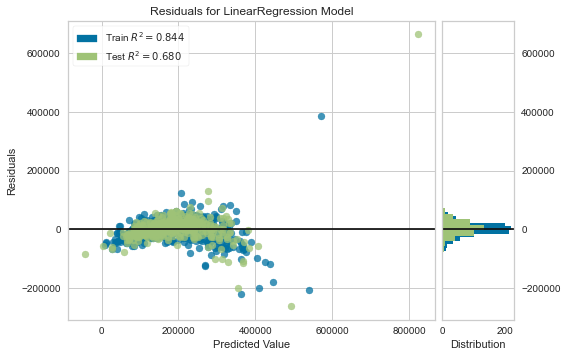

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

#regressor = LinearRegression()
visualizer = ResidualsPlot(regressor)

visualizer.fit(trainX, trainY)  # Fit the training data to the visualizer
visualizer.score(testX, testY)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


In [16]:
regressor = LinearRegression()

regressor.fit(trainX,trainY)

predictions = regressor.predict(testX)

In [17]:
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [-1.20156324e+02  4.62977375e-01  1.64878486e+04  4.21852689e+03
  3.69583297e+02  2.19762553e+02  2.61925155e+01  4.99451834e+00
  2.05250662e+01  3.33107353e+01  4.40358903e+01  1.59539883e+01
  3.19955557e+03 -2.88926847e+03 -2.90217535e+03 -1.32253210e+04
 -1.68460691e+04  6.49492986e+03  1.66548430e+03  1.72941394e+03
  2.11783791e+01  1.75578627e+01 -7.30730503e+00 -8.11758037e+00
  2.91276661e+01  4.06930763e+01  5.51397829e+01 -1.85982975e+00
 -6.55713896e+01  8.70066879e+01]


In [18]:
from sklearn import metrics

In [19]:
print('MAE:',metrics.mean_absolute_error(testY,predictions)),
print('MSE:',metrics.mean_squared_error(testY,predictions)),
print('RMSE',np.sqrt(metrics.mean_squared_error(testY,predictions))),
print('r2:',metrics.r2_score(testY,predictions))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % regressor.score(testX, testY))

MAE: 22929.871097968542
MSE: 2039896773.4394035
RMSE 45165.21641085542
r2: 0.6799838092484927


# Testing Accuracy

In [20]:
print('r2:',metrics.r2_score(testY,predictions))

r2: 0.6799838092484927


# training Accuracy

In [21]:
predictionsT = regressor.predict(trainX)
print('r2:',metrics.r2_score(trainY,predictionsT))

r2: 0.8443985137628478


In [15]:
# The model is over fitted.